In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv', sep=",")

In [4]:
data.shape

(239677, 29)

In [5]:
data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [6]:
data.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [7]:
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((239677, 29), (1059, 29))

In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 239677


In [9]:
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка congressional_district. Тип данных float64. Количество пустых значений 11944, 4.98%.
Колонка latitude. Тип данных float64. Количество пустых значений 7923, 3.31%.
Колонка longitude. Тип данных float64. Количество пустых значений 7923, 3.31%.
Колонка n_guns_involved. Тип данных float64. Количество пустых значений 99451, 41.49%.
Колонка state_house_district. Тип данных float64. Количество пустых значений 38772, 16.18%.
Колонка state_senate_district. Тип данных float64. Количество пустых значений 32335, 13.49%.


In [10]:
data_num = data[num_cols]
data_num

,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
0,14.0,40.3467,-79.8559,NaN,NaN,NaN
1,43.0,33.9090,-118.3330,NaN,62.0,35.0
2,9.0,41.4455,-82.1377,2.0,56.0,13.0
3,6.0,39.6518,-104.8020,NaN,40.0,28.0
4,6.0,36.1140,-79.9569,2.0,62.0,27.0
...,...,...,...,...,...,...
239672,NaN,NaN,NaN,1.0,NaN,NaN
239673,4.0,31.7537,-93.0836,1.0,23.0,31.0
239674,2.0,29.9239,-90.0442,1.0,85.0,7.0
239675,9.0,29.7201,-95.6110,1.0,149.0,17.0


In [11]:
data_num_dist = data_num[['state_house_district']]
data_num_dist.head()

,state_house_district
0,NaN
1,62.0
2,56.0
3,40.0
4,62.0


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [13]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_dist)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
strategies=['mean', 'median', 'most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_dist)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([55.44713173, 55.44713173, 55.44713173, ..., 55.44713173,
        55.44713173, 55.44713173]))

In [20]:
strategies[1], test_num_impute(strategies[1])

('median', array([47., 47., 47., ..., 47., 47., 47.]))

In [21]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([18., 18., 18., ..., 18., 18., 18.]))

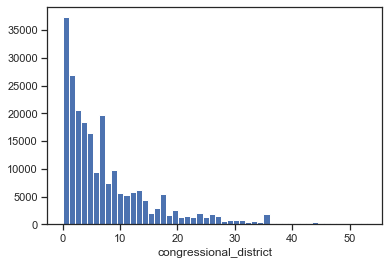

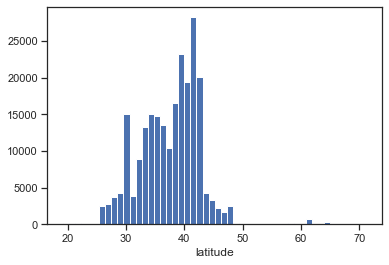

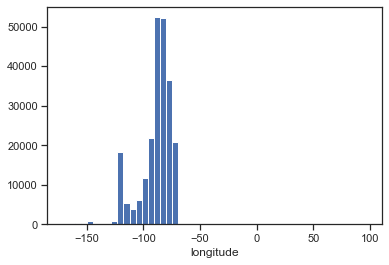

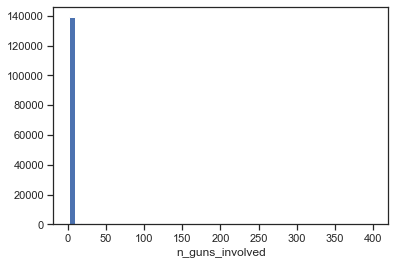

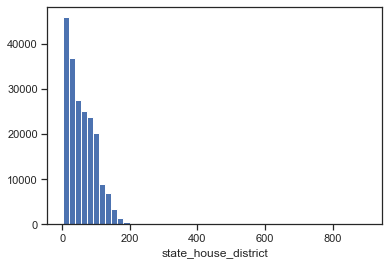

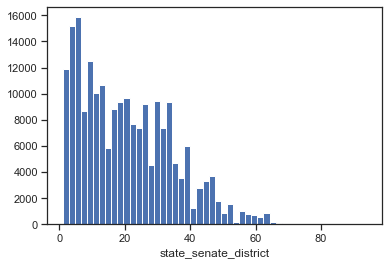

In [78]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [27]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка address. Тип данных object. Количество пустых значений 16497, 6.88%.
Колонка source_url. Тип данных object. Количество пустых значений 468, 0.2%.
Колонка gun_stolen. Тип данных object. Количество пустых значений 99498, 41.51%.
Колонка gun_type. Тип данных object. Количество пустых значений 99451, 41.49%.
Колонка incident_characteristics. Тип данных object. Количество пустых значений 326, 0.14%.
Колонка location_description. Тип данных object. Количество пустых значений 197588, 82.44%.
Колонка notes. Тип данных object. Количество пустых значений 81017, 33.8%.
Колонка participant_age. Тип данных object. Количество пустых значений 92298, 38.51%.
Колонка participant_age_group. Тип данных object. Количество пустых значений 42119, 17.57%.
Колонка participant_gender. Тип данных object. Количество пустых значений 36362, 15.17%.
Колонка participant_name. Тип данных object. Количество пустых значений 122253, 51.01%.
Колонка participant_relationship. Тип данных object. Количество пустых з

In [50]:
cat_temp_data = data[['participant_age']]
cat_temp_data.head()

,participant_age
0,0::20
1,0::20
2,0::25||1::31||2::33||3::34||4::33
3,0::29||1::33||2::56||3::33
4,0::18||1::46||2::14||3::47


In [51]:
cat_temp_data['participant_age'].unique()

array(['0::20', '0::25||1::31||2::33||3::34||4::33',
       '0::29||1::33||2::56||3::33', ...,
       '0::25||1::27||2::29||3::27||4::31', '0::34||1::18||2::17',
       '0::56||1::59||2::58'], dtype=object)

In [52]:
cat_temp_data[cat_temp_data['participant_age'].isnull()].shape

(92298, 1)

In [53]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['0::20'],
       ['0::20'],
       ['0::25||1::31||2::33||3::34||4::33'],
       ...,
       ['0::21'],
       ['0::42'],
       ['0::58||1::62']], dtype=object)

In [54]:
np.unique(data_imp2)

array(['0:1', '0:10', '0:11', ..., '8::29', '9::20||10::20', '9::28'],
      dtype=object)

In [55]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['0::20'],
       ['0::20'],
       ['0::25||1::31||2::33||3::34||4::33'],
       ...,
       ['0::21'],
       ['0::42'],
       ['0::58||1::62']], dtype=object)

In [56]:
np.unique(data_imp3)

array(['0:1', '0:10', '0:11', ..., '9::20||10::20', '9::28', 'NA'],
      dtype=object)

In [57]:
data_imp3[data_imp3=='NA'].size

92298

In [72]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,0::20
1,0::20
2,0::25||1::31||2::33||3::34||4::33
3,0::29||1::33||2::56||3::33
4,0::18||1::46||2::14||3::47
...,...
239672,0::25
239673,1::21
239674,0::21
239675,0::42


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [75]:
cat_enc['c1'].unique()

array(['0::20', '0::25||1::31||2::33||3::34||4::33',
       '0::29||1::33||2::56||3::33', ...,
       '0::25||1::27||2::29||3::27||4::31', '0::34||1::18||2::17',
       '0::56||1::59||2::58'], dtype=object)

In [76]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 18948, 18949, 18950])

In [77]:
le.inverse_transform([0, 1, 2, 3])

array(['0:1', '0:10', '0:11', '0:11|1:12'], dtype=object)